In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf_convstrat import conv_strat_latlon

import matplotlib
import wrf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
from datetime import datetime
import copy

In [2]:
#create a function that sets up background

def make_background(ax, minlon, maxlon, minlat, maxlat, country):
    ax.set_extent([minlon, maxlon, minlat, maxlat], crs=ccrs.PlateCarree())
    
    #input the state/provinces shapefile
    states110 = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='110m',
            facecolor='none', edgecolor='k')


    #add coastlines and country borders on top of country states
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.OCEAN, edgecolor=None, fc='lightcyan')
    ax.add_feature(states110)


In [3]:
def make_gridlines(ax, top, bot, left, right):
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, draw_labels=True, color='#454545', alpha=0.9, linestyle='--')
    gl.ylocator = mticker.FixedLocator(np.arange(-90, 91, 10))
    gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 10))
    gl.top_labels = top
    gl.right_labels = right
    gl.bottom_labels = bot
    gl.left_labels = left

In [8]:
path = '/glade/scratch/hungjui/temp/'
# file = 'dbz_lev_3000_2013091300.nc'
file = 'dbz_lev_3000_2011042700.nc'

data = Dataset(path+file, 'r')

refl = np.array(data.variables['dBZ_interp'])
lat = np.array(data.variables['XLAT'])
lon = np.array(data.variables['XLONG'])

In [9]:
cs,cc,bkgnd = conv_strat_latlon(refl, lat, lon)

In [10]:
cs[np.where(refl < -20)] = -1
cs[np.where(np.isnan(refl))] = -1

/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("nipy_spectral"))
  if sys.path[0] == '':
/glade/u/ssg/ch/usr/jupyterhub/envs/npl-3.7.9/dav/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("nipy_spectral_r"))


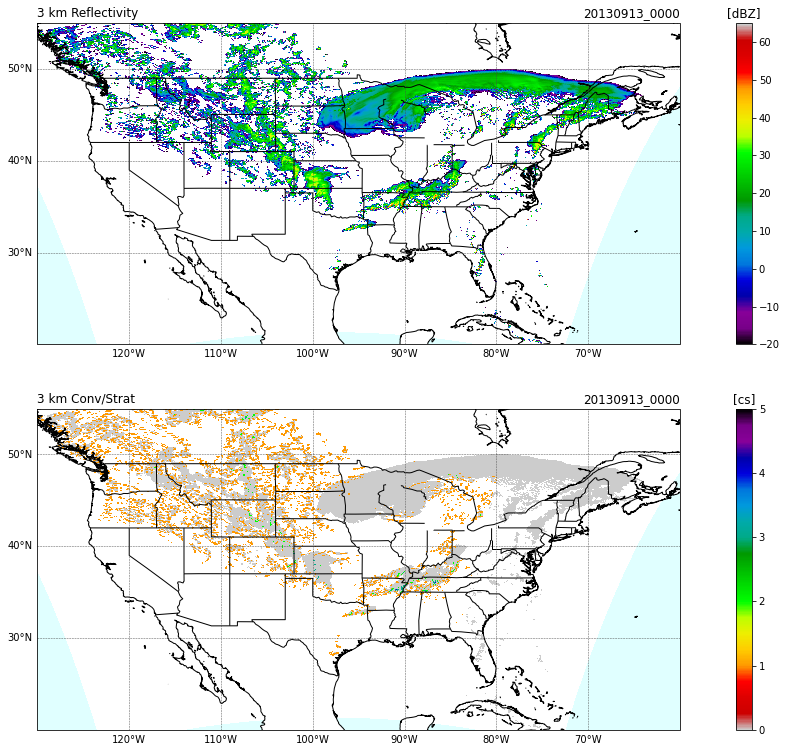

In [11]:
fig = plt.figure(figsize=(20,13))

x1,x2,y1,y2 = -130, -60, 20, 55

ax = plt.subplot(211, projection=ccrs.PlateCarree())
make_background(ax, x1, x2, y1, y2, 'United States of America')

ax.set_title('3 km Reflectivity', loc='left')
ax.set_title('20130913_0000', loc='right')

dbz = ax.pcolormesh(lon, lat, refl, vmin=-20, vmax=65, cmap='nipy_spectral')
dbz.cmap.set_under('w')

cbar = plt.colorbar(dbz)
cbar.ax.set_title('[dBZ]')

make_gridlines(ax, False, True, True, False)
#############################################################

ax = plt.subplot(212, projection=ccrs.PlateCarree())
make_background(ax, x1, x2, y1, y2, 'United States of America')

ax.set_title('3 km Conv/Strat', loc='left')
ax.set_title('20130913_0000', loc='right')

constr = ax.pcolormesh(lon, lat, cs, vmin=0, vmax=5, cmap='nipy_spectral_r')
constr.cmap.set_under('w')

cbar = plt.colorbar(constr)
cbar.ax.set_title('[cs]')

make_gridlines(ax, False, True, True, False)


#plt.savefig('conus_convstrat_test_20130913_0000.png', dpi=400, bbox_inches='tight')